# Backpropagation: Regning og koding

Backproagation er algoritmen som oppdaterer vektene i et feedforward nettverk, og er helt sentral del av læringsprosessen. Å ha en grunnleggend forståelse for denne prossesen er viktig for å skjønne hvordan moderne maskinlæring virker. I denne seksjonen skal vi gå litt i dybden på matematikken som ligger bak, både med regning og koding. For kode-delen tar denne notebooken i bruk biblioteket [Micrograd](https://github.com/karpathy/micrograd), som er utviklet av Andrej Karapthy.

Vi vil holde oss til små eksempler, for at konseptet skal være lettere å forstå og regne på.

### Grunnprinsippet

I sin enkleste form er prinsippet som følger: En input sendes gjennon nettverket, der det gjennomføres en serie med linære operasjoner. Disse linære operasjonene består av *vekter* $W$, og *bias* $b$, på formen $$y = W \cdot x + b$$der $x$ er input og $y$ er output i hver operasjon. I et stort nettverk gjøres veldig mange av disse operasjonenen etter hverandre.

![](../media/AI_basic_nevron.png)

Til slutt får vi en endelig output, som vi gjerne kaller nettverkets prediksjon. Under veiledet (supervised) trening sammenliknes denne prediksjonen med en kjent sannhet. Forskjellen mellom prediksjonen og sannheten kalles *tapet* (loss) og betegnes ofte $L$.

### Et veldig enkelt eksempel
Gitt at vi har et nettverk bestående av ett nevron, med $W = -3$ og $b=10$, vi sender inn input $x = 2$. Hva blir outputen? 

In [1]:
# print(2*-3 + 10)

Vi legger til ett nevron til, med $W = -2$ og $b=0$. Nettverket vårt er nå

![](../media/simple_node.png)

Hva er outputen nå?

Vi kan implementere nettverket vårt i en enkel python funksjon, og se hva slags output det vil gi for ulike verdier.

In [2]:
def nettverk(x,w1,b1,w2,b2):
    y1 = x*w1 + b1
    y2 = y1*w2 +b2
    return y2

In [3]:
# print(nettverk(2,-3,10,-2,0))

### Kort om optimering
Under trening ønsker vi å finne de vektene som gir lavest tap, og dermed det mest presise nettverket. Dette gjøres ved å regne ut tapet, og justere vektene ett lite steg i den retningen som gjør tapet mindre. Denne metoden kalles *gradient descent*.

![](../media/gradient_descent.jpg)

Backpropagation handler om å regne ut nettopp hva denne justeringen skal være.

### Hvordan påvirker vektene tapet?

For å vite hva som er riktig justering av vektene, er vi avhengig av å vite hva sammenhengen mellom vektene og tapet er. Hvor mye vil en endring i vektene påvirke outputen?

Outputen er en funksjon av alle vektene og biasen, så relasjonen mellom endringene der og endringene til tapet er gitt ved gradientene til hver av dem med hensyn på tapet.

I vårt lille eksempel har vi to nevroner med vekter og bias, for enkelthetes skyld kan vi kalle dem $W_1, b_1, W_2$ og $b_2$. Vi setter også tapet i denne sammenhengen til å være $L = (y_2 - y_*)^2/2$ , der $y_2$ er outputen etter det andre laget, og $y_*$ er det vi ønsker at nettverket skal produsere.

$$\begin{align}
y_1 = & W_1 \cdot x + b_1 \\
y_2 = & W_2 \cdot y_1 + b_2 \\
L = & \frac{(y_2-y_*)^2}{2}
\end{align}$$

Vi kan først regne for nevron 2. Her må vi bruke kjerneregelen:

$$\begin{align*}
\nabla _{y_2} &= \frac{dL}{dy_2} = (y_2-y_*)\\
\nabla _{W_2} &= \frac{dL}{dW_2} = \frac{dL}{dy_2} \cdot \frac{dy_2}{dW_2} = \nabla _{y_2} \cdot y_1 \\
\nabla _{b_2} &= \frac{dL}{db_2} = \frac{dL}{dy_2} \cdot \frac{dy_2}{db_2} =  \nabla _{y_2} \cdot 1 \\
\end{align*}$$

Og beveger oss bakover til nevron 1.

$$\begin{align*}
\nabla _{y_1} &= \frac{dL}{dy_1} = \frac{dL}{dy_2} \cdot \frac{dy_2}{dy_1} = \nabla _{y_2} \cdot W_2\\
\nabla _{W_1} &= \frac{dL}{dW_1} = \frac{dL}{dy_2} \cdot \frac{dy_2}{dy_1} \cdot \frac{dy_1}{dW_1} = \nabla _{y_1}\cdot x \\
\nabla _{b_1} &= \frac{dL}{db_1} = \frac{dL}{dy_2} \cdot \frac{dy_2}{dy_1} \cdot \frac{dy_1}{db_1} = \nabla _{y_1} \cdot 1 \\
\end{align*}$$

Her ser vi at $\nabla _{y_2}$ nevron 2 blir brukt til å regne ut gradienten for nevron 1. Selv om dette er et lite eksempel vil denne oppførselen være lik bare i mye større skala for dypere nettverk. Gradientene blir først regnet ut bakerst i nettverket, og "flyter" bakover, der de påvirker gradientene til de tidligere nevronene. 

### Oppgave: Hva blir verdien til gradientene?
Vi har at $W_1 = -3, b_1=10, W_2 = -2, b_2=0$, og vi sender inn input $x=2$. Gitt at fasiten var $y_* = -5$, hva blir gradientene i eksempelet? Regn ut for hånd.

Vi kan verifisere svarene med micrograd.

In [4]:
# legg til src i path
from pathlib import Path
import sys

src_path = Path(".").absolute().parent / Path('src')
sys.path.append(src_path.__str__())

In [5]:
from backprop_functions import Value, draw_dot
# sett opp variabler
x = Value(2,label="x")
w1 = Value(-3, label="w1")
b1 = Value(10, label="b1")
y1 = x*w1 + b1  ; y1.label = "y1"
w2 = Value(-2, label="w2")
b2 = Value(0, label="b2")
y2 = y1*w2 + b2 ; y2.label="y2"

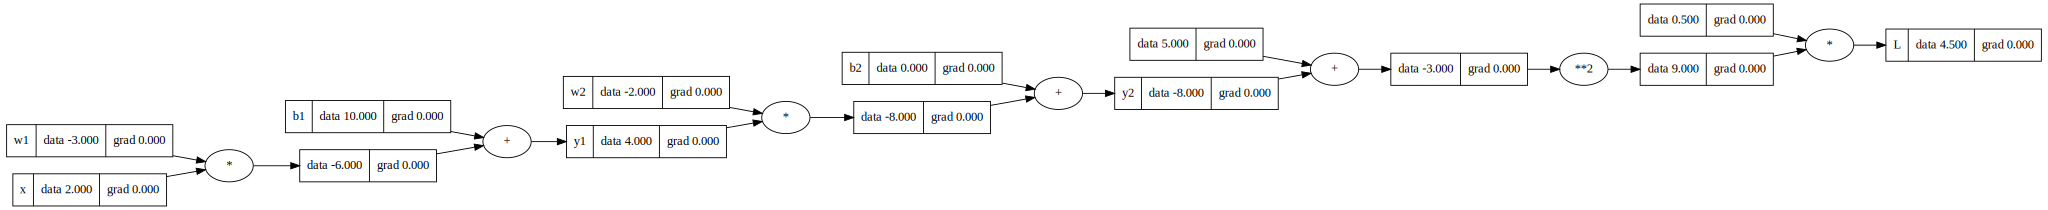

In [6]:
# sett opp tap
y_ = -5
L = 0.5*(y2-y_)**2 ; L.label = "L"
draw_dot(L)

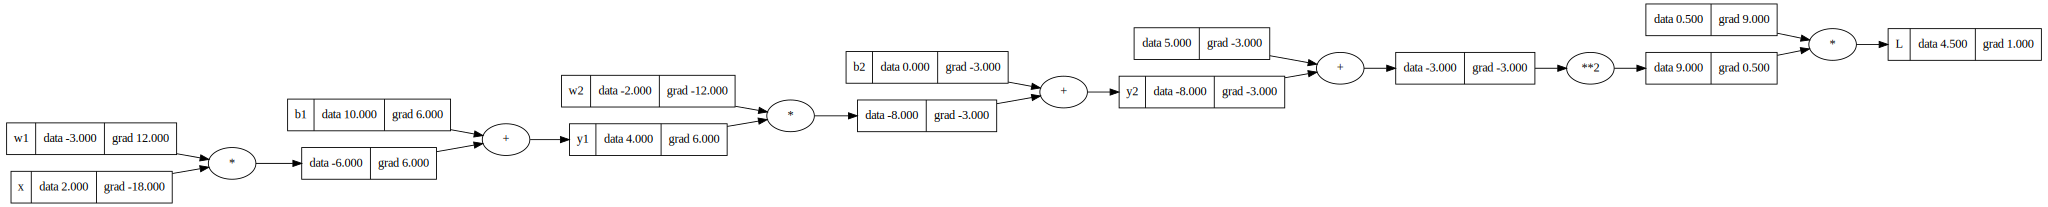

In [7]:
# gjør back propagation
L.backward()
draw_dot(L)

### Et (litt mindre) enkelt eksemel

Vanligvis nat et nevron i et nettverk mer input fra mye mer enn ett nevron. Da har de gjerne en vekt per input. La oss se på ett litt mer komplekst eksempel, med 4 sett med vekter og bias.

![](../media/double_node.png)

Her er 

$$
\begin{align*}
y_1 = & W_1 \cdot x + b_1 \\
y_2 = & W_2 \cdot x + b_2 \\
y_3 = & W_{3_1} \cdot y_1 + W_{3_2} \cdot y_2 + b_3 \\
L = & \frac{(y_3-y_*)^2}{2}
\end{align*}
$$



Vi regner ut gradientene for det bakerste laget:

$$\begin{align*}
\nabla _{y_3} &= \frac{dL}{dy_3} = (y_3-y_*)\\
\nabla _{W_{3_1}} &= \frac{dL}{dW_{3_1}} = \frac{dL}{dy_3} \cdot \frac{dy_3}{dW_{3_1}} = \nabla _{y_3} \cdot y_1 \\
\nabla _{W_{3_2}} &= \frac{dL}{dW_{3_2}} = \frac{dL}{dy_3} \cdot \frac{dy_3}{dW_{3_2}} = \nabla _{y_3} \cdot y_2 \\
\nabla _{b_3} &= \frac{dL}{db_3} = \frac{dL}{dy_3} \cdot \frac{dy_3}{db_3} =  \nabla _{y_3} \cdot 1 \\
\end{align*}$$


### Oppgave: Hva blir utrykkene for gradientene i det siste laget?

Fasit:
$$\begin{align*}
\nabla _{y_2} &= \frac{dL}{dy_2} = \frac{dL}{dy_3} \cdot \frac{dy_3}{dy_2} = \nabla _{y_3} \cdot W_{3_2}\\
\nabla _{W_2} &= \frac{dL}{dW_2} = \frac{dL}{dy_3} \cdot \frac{dy_3}{dy_2} \cdot \frac{dy_2}{dW_2} = \nabla _{y_2}\cdot x\\
\nabla _{b_2} &= \frac{dL}{db_2} = \frac{dL}{dy_3} \cdot \frac{dy_3}{dy_2} \cdot \frac{dy_2}{db_2} = \nabla _{y_2} \cdot 1 \\
\end{align*}$$

$$\begin{align*}
\nabla _{y_1} &= \frac{dL}{dy_1} = \frac{dL}{dy_3} \cdot \frac{dy_3}{dy_1} = \nabla _{y_3} \cdot W_{3_1}\\
\nabla _{W_1} &= \frac{dL}{dW_1} = \frac{dL}{dy_3} \cdot \frac{dy_3}{dy_1} \cdot \frac{dy_2}{dW_1} = \nabla _{y_1}\cdot x\\
\nabla _{b_1} &= \frac{dL}{db_1} = \frac{dL}{dy_3} \cdot \frac{dy_3}{dy_1} \cdot \frac{dy_1}{db_1} = \nabla _{y_1} \cdot 1 \\
\end{align*}$$

### Oppgave: Hva blir y?

1) Gitt at vektene og biasene fra 1-3 er som vist i figuren og input er $x=2$, hva blir $y$?

In [8]:
# sjekk svar mot micrograd

# sett opp variabler
x = Value(2,label="x")

w1 = Value(-3, label="w1")
b1 = Value(10, label="b1")
y1 = x*w1 + b1  ; y1.label = "y1"

w2 = Value(-2, label="w2")
b2 = Value(0, label="b2")
y2 = x*w2 + b2 ; y2.label="y2"

w31 = Value(4, label="w31")
w32 = Value(2, label="w32")
b3 = Value(-1, label="b3")
y3 = y1*w31 + y2*w32 + b3 ; y3.label="y3"

Value(data=7, grad=0)


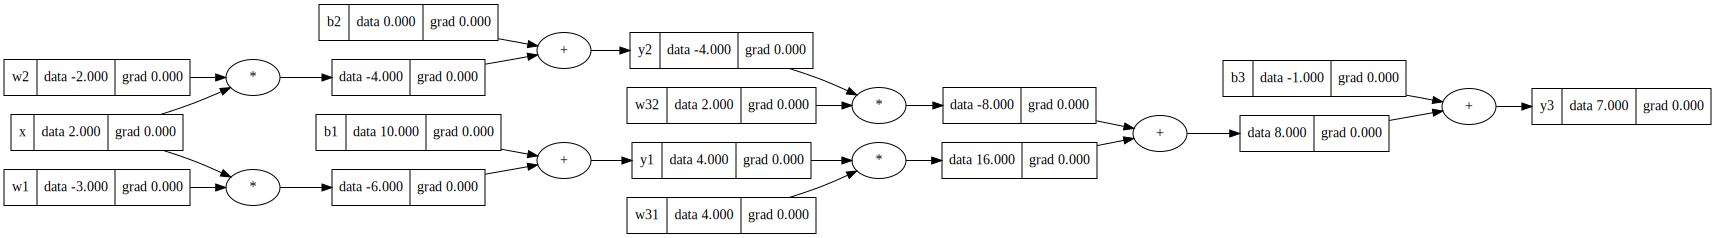

In [9]:
print(y3)
draw_dot(y3)

### Oppgave: Hva blir gradientene?

Gi at riktig ønsket output er $y_* = 9$, hva blir gradientene?

In [10]:
y_ = 9
L = 0.5*(y3-y_)**2
L.backward()

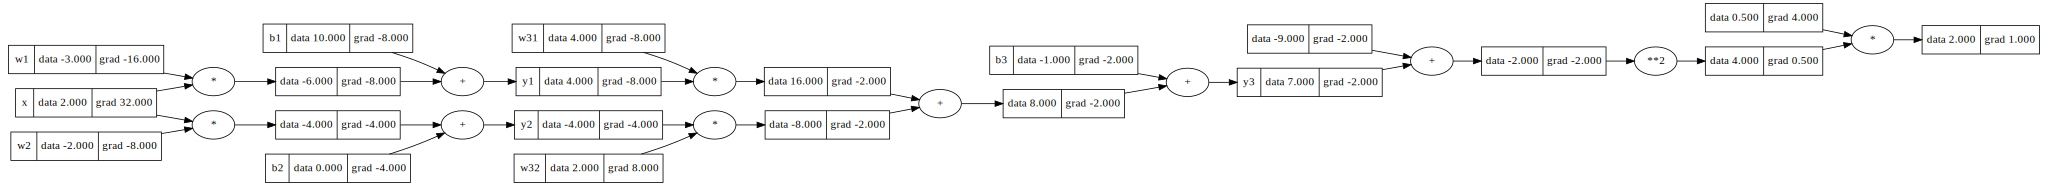

In [11]:
draw_dot(L)

### Oppdatering av vekter

Når vi har regnet ut alle gradientene, kan vi oppdatere vektene i nettverket. Dette gjøres ved

$$ W_{\text{new}} = W - \lambda \nabla _W $$

Der $\lambda$ er et lite tall, vi kaller læringsraten.

In [12]:
from backprop_functions import trace

nodes,edges = trace(L)

lr = 0.01

for node in nodes:
    node.data = node.data - lr*node.grad 

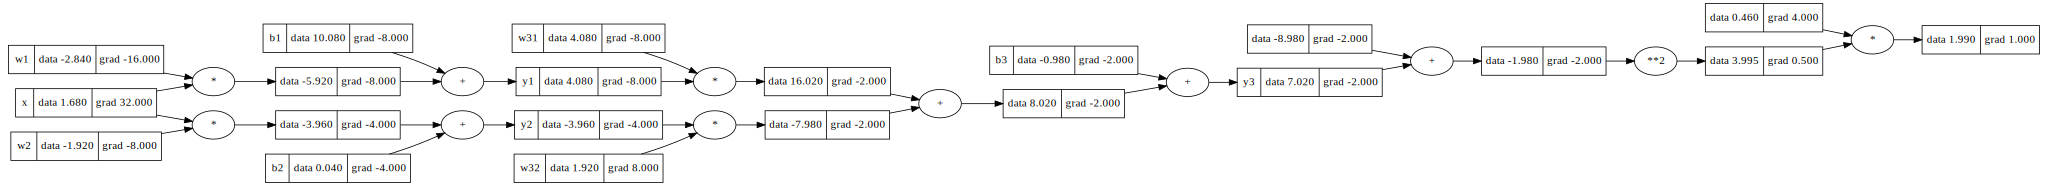

In [13]:
draw_dot(L)